```
다음 파일을 다운로드
https://github.com/dhrim/MDC_2021/blob/master/material/deep_learning/data/wine.csv

- quality 컬럼의 최대값, 최소값을 출력
- density 컬럼을 %로 변경한 컬럼 density_percent를 생성. 소수점 1자리만 남기고.
- fixed acidity 컬럼의 상위 10%, 하위 10% 값을 출력
- 새로운 컬럼 grade를 추가. fixed acidity 상위 10% 이상은 1, 하위 10% 이하는 3, 중간은 2의 값으로.
```

In [ ]:
!rm -rf wine*

In [ ]:
a = 0.123456

123.456

123

12.3

In [ ]:
!wget https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/deep_learning/data/wine.csv

--2021-11-24 00:34:49--  https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/deep_learning/data/wine.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 418942 (409K) [text/plain]
Saving to: ‘wine.csv’

wine.csv            100%[===================>] 409.12K  --.-KB/s    in 0.01s   

2021-11-24 00:34:49 (29.5 MB/s) - ‘wine.csv’ saved [418942/418942]



In [ ]:
!head wine.csv

2index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.9943200000000001,3.44,0.44,10.2,white
1,5,8.8,0.61,0.14,2.4,0.067,10.0,42.0,0.9969,3.19,0.59,9.5,red
2,5,7.9,0.21,0.39,2.0,0.057,21.0,138.0,0.9917600000000001,3.05,0.52,10.9,white
3,6,7.0,0.21,0.31,6.0,0.046,29.0,108.0,0.9939,3.26,0.5,10.8,white
4,6,7.8,0.4,0.26,9.5,0.059000000000000004,32.0,178.0,0.9955,3.04,0.43,10.9,white
5,6,6.0,0.19,0.37,9.7,0.032,17.0,50.0,0.9932,3.08,0.66,12.0,white
6,5,6.1,0.22,0.49,1.5,0.051,18.0,87.0,0.9928,3.3,0.46,9.6,white
7,6,7.1,0.38,0.42,11.8,0.040999999999999995,32.0,193.0,0.99624,3.04,0.49,10.0,white
8,5,6.8,0.24,0.31,18.3,0.046,40.0,142.0,1.0,3.3,0.41,8.7,white


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("wine.csv")

In [ ]:
df.head()

,2index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [ ]:
print("quality max = ", df.quality.max())
print("quality min = ", df.quality.min())

quality max =  9
quality min =  3


In [ ]:
df['density_precent'] = (df.density * 1000).astype(np.int)/10.

In [ ]:
df.head()

,2index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,density_precent
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white,99.4
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red,99.6
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white,99.1
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white,99.3
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white,99.5


In [ ]:
a = 0.12345
print(a)
print(a*1000)
print(int(a*1000))
print(int(a*1000)/10)

0.12345
123.45
123
12.3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   2index                5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
 14  density_precent       5497 non-null   float64
dtypes: float64(12), int64

In [ ]:
DATA_COUNT = 5497
UPPER_INDEX = int(5497*0.1)
LOWER_INDEX = int(5497*0.9)
print(UPPER_INDEX, LOWER_INDEX)
UPPER_VALUE = df['fixed acidity'].sort_values().iloc[549]
LOWER_VALUE = df['fixed acidity'].sort_values().iloc[4947]
print(UPPER_VALUE, LOWER_VALUE)

549 4947
12.6 7.4


In [ ]:
def get_grade(value):
  if value >= UPPER_VALUE : return 1
  elif value < LOWER_VALUE : return 3
  else: return 2

df['grade'] = df[['fixed acidity']].applymap(get_grade)

In [ ]:
df.head()

,2index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,density_precent,grade
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white,99.4,3
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red,99.6,2
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white,99.1,2
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white,99.3,3
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white,99.5,2


In [ ]:
for i in [0, 100, 200, 300, 400]:
  print(df['fixed acidity'][i])  
  print(df['fixed acidity'].sort_values().iloc[i])

5.6
3.8
8.5
5.2
8.1
5.6
7.4
5.7
6.6
5.8


In [ ]:
df.loc[df.column>10, 'new_column'] = 10

8.5
8.5


In [ ]:
df = pd.DataFrame(
    {"AAA":[4,5,6,7],
     "BBB":[10,20,30,40],
     "CCC":[100,50,-30,-50]}
)

print(df)
# df.drop(1, inplace=True)
new_df = df.drop(1)
print(df)
print(new_df)

   AAA  BBB  CCC
0    4   10  100
1    5   20   50
2    6   30  -30
3    7   40  -50
   AAA  BBB  CCC
0    4   10  100
1    5   20   50
2    6   30  -30
3    7   40  -50
   AAA  BBB  CCC
0    4   10  100
2    6   30  -30
3    7   40  -50


In [ ]:
df = pd.DataFrame(
    {"AAA":[4,5,6,7],
     "BBB":[10,20,30,40],
     "CCC":[100,50,-30,-50]}
)

df.drop([1,3], inplace=True)
print(df)

   AAA  BBB  CCC
0    4   10  100
2    6   30  -30


In [ ]:
df = pd.DataFrame(
    {"AAA":[4,5,6,7],
     "BBB":[10,20,30,40],
     "CCC":[100,50,-30,-50]}
)


target_index = df.loc[df['AAA']%2==0].index
print(target_index)
df.drop(target_index, inplace=True)
print(df)

Int64Index([0, 2], dtype='int64')
   AAA  BBB  CCC
1    5   20   50
3    7   40  -50


In [ ]:
df = pd.DataFrame(
    {"AAA":["철수", "영희", "tom", ""],
     "BBB":[10,20,30,40],
     "CCC":[100,50,-30,-50]}
)

target_index = df.loc[df['AAA']==""].index
print(target_index)
df.drop(target_index, inplace=True)
print(df)

Int64Index([3], dtype='int64')
   AAA  BBB  CCC
0   철수   10  100
1   영희   20   50
2  tom   30  -30


In [ ]:
df = pd.DataFrame(
    {"AAA":[4,5,6,7],
     "BBB":[10,35,30,25],
     "CCC":[100,50,-30,-50]}
)

print(df.sort_values(by="BBB"))
print(df)

   AAA  BBB  CCC
0    4   10  100
3    7   25  -50
2    6   30  -30
1    5   35   50
   AAA  BBB  CCC
0    4   10  100
1    5   35   50
2    6   30  -30
3    7   25  -50


In [ ]:
df = pd.DataFrame(
    {"AAA":[4,5,6,7],
     "BBB":[10,35,30,25],
     "CCC":[100,50,-30,-50]}
)

print(df.sort_values(by="BBB", inplace=True))
print(df)

None
   AAA  BBB  CCC
0    4   10  100
3    7   25  -50
2    6   30  -30
1    5   35   50


In [ ]:
df = pd.DataFrame(
    {"AAA":[4,5,6,7],
     "BBB":[10,30,30,25],
     "CCC":[100,50,-30,-50]}
)

df.sort_values(by=["BBB", "CCC"], inplace=True)
print(df)

   AAA  BBB  CCC
0    4   10  100
3    7   25  -50
2    6   30  -30
1    5   30   50


In [ ]:
df = pd.DataFrame(
    {"AAA":[4,5,6,7],
     "BBB":[10,35,30,25],
     "CCC":[100,50,-30,-50]}
)

print(df.CCC.abs())
print(df.CCC.abs().sort_values())
print(df.CCC.abs().sort_values().index)
print(df.loc[[2,1,3,0]])

0    100
1     50
2     30
3     50
Name: CCC, dtype: int64
2     30
1     50
3     50
0    100
Name: CCC, dtype: int64
Int64Index([2, 1, 3, 0], dtype='int64')
   AAA  BBB  CCC
2    6   30  -30
1    5   35   50
3    7   25  -50
0    4   10  100


In [ ]:
df = pd.DataFrame(
    {"AAA":[4,5,6,7],
     "BBB":[10,35,30,25],
     "CCC":[100,50,-30,-50]}
)

print(df['CCC']-10)
print((df['CCC']-10).abs())
print((df['CCC']-10).abs().sort_values())
print((df['CCC']-10).abs().sort_values().index)
print(df.loc[(df['CCC']-10).abs().sort_values().index])
print(df.loc[(df['CCC']-10).abs().argsort()])

0    90
1    40
2   -40
3   -60
Name: CCC, dtype: int64
0    90
1    40
2    40
3    60
Name: CCC, dtype: int64
1    40
2    40
3    60
0    90
Name: CCC, dtype: int64
Int64Index([1, 2, 3, 0], dtype='int64')
   AAA  BBB  CCC
1    5   35   50
2    6   30  -30
3    7   25  -50
0    4   10  100
   AAA  BBB  CCC
1    5   35   50
2    6   30  -30
3    7   25  -50
0    4   10  100


In [ ]:
a = np.array([1,3,5,2,4])
print(np.argmax(a))
print(np.argsort(a))

2
[0 3 1 4 2]


In [ ]:
df = pd.DataFrame({ 
        "num" : [ 0,1,2,3,4,5,6,7,8,9],
        "name" : ["A", "A", "B", "B", "C", "C", "A", "A", "B", "B"]
     })
print(df)

df['name_category'] = df['name'].astype('category').cat.codes
print(df)

   num name
0    0    A
1    1    A
2    2    B
3    3    B
4    4    C
5    5    C
6    6    A
7    7    A
8    8    B
9    9    B
   num name  name_category
0    0    A              0
1    1    A              0
2    2    B              1
3    3    B              1
4    4    C              2
5    5    C              2
6    6    A              0
7    7    A              0
8    8    B              1
9    9    B              1


In [ ]:
df = pd.DataFrame({ 
        "num" : [ 0,1,2,3,4,5,6,7,8,9],
        "name" : ["A", "A", "B", "B", "C", "C", "A", "A", "B", "B"]
     })

categories = [ "D", "C", "A", "B" ]
df['name_category'] = pd.Categorical(df['name'], 
                        categories=categories, ordered=True).codes
print(df)

   num name  name_category
0    0    A              2
1    1    A              2
2    2    B              3
3    3    B              3
4    4    C              1
5    5    C              1
6    6    A              2
7    7    A              2
8    8    B              3
9    9    B              3


In [ ]:
df = pd.DataFrame({ 
        "num" : [ 0,1,2,3,4,5,6,7,8,9],
        "name" : ["A", "A", "B", "B", "C", "C", "A", "A", "B", "B"]
     })

category_map = { "B":10, "C":11, "A":12, "D":13 }
df['name_category'] = df['name'].map(category_map)
print(df)

   num name  name_category
0    0    A             12
1    1    A             12
2    2    B             10
3    3    B             10
4    4    C             11
5    5    C             11
6    6    A             12
7    7    A             12
8    8    B             10
9    9    B             10


In [ ]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, 5],
                   [np.nan, 3, np.nan, 4]],
                  columns=["A", "B", "C", "D"])

print(df)
print(df.isnull())
print(df.isnull().any())
print(df.isnull().any().any())

     A    B   C  D
0  NaN  2.0 NaN  0
1  3.0  4.0 NaN  1
2  NaN  NaN NaN  5
3  NaN  3.0 NaN  4
       A      B     C      D
0   True  False  True  False
1  False  False  True  False
2   True   True  True  False
3   True  False  True  False
A     True
B     True
C     True
D    False
dtype: bool
True


In [ ]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, 5],
                   [np.nan, 3, np.nan, 4]],
                  columns=["A", "B", "C", "D"])

print(df.isnull().sum())
print(df.isnull().sum().sum())
print(df.isnull().any())
print(df.isnull().any().sum())

data_count = len(df)

print(df.isnull().sum()/data_count)


A    3
B    1
C    4
D    0
dtype: int64
8
A     True
B     True
C     True
D    False
dtype: bool
3
A    0.75
B    0.25
C    1.00
D    0.00
dtype: float64


In [ ]:
print(len(df))

4


In [1]:
!wget https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/deep_learning/data/titanic.csv

--2021-11-24 04:04:58--  https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/deep_learning/data/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  59.76K  --.-KB/s    in 0.01s   

2021-11-24 04:04:58 (5.31 MB/s) - ‘titanic.csv’ saved [61194/61194]



In [2]:
!head titanic.csv

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S
6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S


In [3]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
data_count = len(df)
print(df.isnull().sum()/data_count)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64


In [10]:
df.loc[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [13]:
df.drop(df.loc[df.Embarked.isnull()].index, inplace=True)

In [14]:
df.info()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [15]:
df.drop(df.loc[df.Age.isnull()].index, inplace=True)

In [16]:
df.drop(df.loc[df.Cabin.isnull()].index, inplace=True)

In [17]:
df.info()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [23]:
df = pd.read_csv("titanic.csv")
print(df.info())
print(df.isnull().any().any())
print()
df.dropna(inplace=True)
print(df.info())
print(df.isnull().sum())
print(df.isnull().any().any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
True

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1

In [27]:
# 컬럼 삭제
df = pd.read_csv("titanic.csv")
print(df.info())

df.drop(columns=['Age','Cabin','Embarked'],inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Surv

In [33]:
df = pd.read_csv("titanic.csv")
print(df.isnull().sum())
print()

df.loc[df.Age.isnull(),'Age'] = 0
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [48]:
df = pd.read_csv("titanic.csv")
df.loc[df.Age.notnull()]
print(np.mean(df.loc[df.Age.notnull()]))
print()
age_mean = df.loc[df.Age.notnull()].Age.mean()
print(age_mean)
df.loc[df.Age.isnull(),'Age'] = age_mean
df.isnull().sum()

PassengerId    448.582633
Survived         0.406162
Pclass           2.236695
Age             29.699118
SibSp            0.512605
Parch            0.431373
Fare            34.694514
dtype: float64

29.69911764705882


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [46]:
# Age: 평균으로 대체, Cabin: 컬럼 버리기, Embarked: 데이터 버리기

In [56]:
df = pd.read_csv('titanic.csv')
age_mean = df.loc[df.Age.notnull()].Age.mean()
df.loc[df.Age.isnull(),'Age'] = age_mean

df.drop(columns='Cabin', inplace = True)

df.drop(df.loc[df.Embarked.isnull()].index, inplace=True)


print("age mean = ", df.Age.mean())
print(df.info())
print(df.Embarked.isnull().sum())

age mean =  29.653446370674192
<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB
None
0


In [58]:
df = pd.read_csv('titanic.csv')
age_mean = df.loc[df.Age.notnull()].Age.mean()

default_value = {"Age":age_mean, "Cabin":"UNKNOWN", "Embarked":"N"}
df.fillna(default_value, inplace=True)
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
0      UNKNOWN
1          C85
2      UNKNOWN
3         C123
4      UNKNOWN
        ...   
886    UNKNOWN
887        B42
888    UNKNOWN
889       C148
890    UNKNOWN
Name: Cabin, Length: 891, dtype: object


In [63]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, 5],
                   [np.nan, 3, np.nan, 4]],
                  columns=list('ABCD'))

print(df)
print()
df.fillna(method="ffill", inplace=True)
print(df)

     A    B   C  D
0  NaN  2.0 NaN  0
1  3.0  4.0 NaN  1
2  NaN  NaN NaN  5
3  NaN  3.0 NaN  4

     A    B   C  D
0  NaN  2.0 NaN  0
1  3.0  4.0 NaN  1
2  3.0  4.0 NaN  5
3  3.0  3.0 NaN  4


In [64]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, 5],
                   [np.nan, 3, np.nan, 4]],
                  columns=list('ABCD'))

print(df)
print()
df.fillna(method="bfill", inplace=True)
print(df)

     A    B   C  D
0  NaN  2.0 NaN  0
1  3.0  4.0 NaN  1
2  NaN  NaN NaN  5
3  NaN  3.0 NaN  4

     A    B   C  D
0  3.0  2.0 NaN  0
1  3.0  4.0 NaN  1
2  NaN  3.0 NaN  5
3  NaN  3.0 NaN  4


In [65]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, 5],
                   [np.nan, 3, np.nan, 4]],
                  columns=list('ABCD'))

print(df)
print()
df.fillna(method="ffill", inplace=True)
df.fillna(method="bfill", inplace=True)
print(df)

     A    B   C  D
0  NaN  2.0 NaN  0
1  3.0  4.0 NaN  1
2  NaN  NaN NaN  5
3  NaN  3.0 NaN  4

     A    B   C  D
0  3.0  2.0 NaN  0
1  3.0  4.0 NaN  1
2  3.0  4.0 NaN  5
3  3.0  3.0 NaN  4


In [70]:
df = pd.read_csv('titanic.csv')
age_mean = df.loc[df.Age.notnull()].Age.mean()

default_value = {"Age":age_mean, "Cabin":"UNKNOWN", "Embarked":"N"}
df.fillna(default_value, inplace=True)

print(df.Age.max())
print(df.Age.min())
max = df.Age.max()
min = df.Age.min()

df['Age_normalized'] = (df.Age - min)/(max-min) # 정규화

80.0
0.42


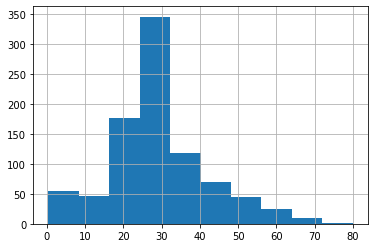

In [72]:
df.Age.hist()

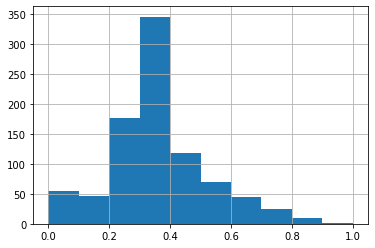

In [71]:
df.Age_normalized.hist()

In [73]:
df = pd.read_csv('titanic.csv')
age_mean = df.loc[df.Age.notnull()].Age.mean()

default_value = {"Age":age_mean, "Cabin":"UNKNOWN", "Embarked":"N"}
df.fillna(default_value, inplace=True)

mean = df.Age.mean()
std = df.Age.std()

df['Age_standardization'] = (df.Age - mean) / std

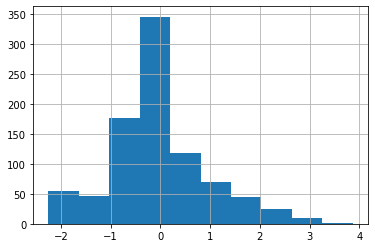

In [74]:
df.Age_standardization.hist()

In [76]:
df = pd.DataFrame({ 
        "num" : [ 0,1,2,3,4,5,6,7,8,9],
        "name" : ["A", "A", "B", "B", "C", "C", "A", "A", "B", "B"]
     })

categories = [ "D", "C", "A", "B" ]
df['name_category'] = pd.Categorical(df['name'], 
                        categories=categories, ordered=True).codes
print(df)
df.drop(columns='num', inplace=True)
print(df)


   num name  name_category
0    0    A              2
1    1    A              2
2    2    B              3
3    3    B              3
4    4    C              1
5    5    C              1
6    6    A              2
7    7    A              2
8    8    B              3
9    9    B              3
  name  name_category
0    A              2
1    A              2
2    B              3
3    B              3
4    C              1
5    C              1
6    A              2
7    A              2
8    B              3
9    B              3


In [77]:
df.to_csv("my_data.csv",index=False)

In [78]:
!head 'my_data.csv'

name,name_category
A,2
A,2
B,3
B,3
C,1
C,1
A,2
A,2
B,3


In [79]:
new_df = pd.read_csv("my_data.csv")
new_df.head()

,name,name_category
0,A,2
1,A,2
2,B,3
3,B,3
4,C,1


In [80]:
!wget https://github.com/bharathirajatut/sample-excel-dataset/raw/master/airline.xls

--2021-11-24 05:38:29--  https://github.com/bharathirajatut/sample-excel-dataset/raw/master/airline.xls
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/bharathirajatut/sample-excel-dataset/master/airline.xls [following]
--2021-11-24 05:38:29--  https://raw.githubusercontent.com/bharathirajatut/sample-excel-dataset/master/airline.xls
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16384 (16K) [application/octet-stream]
Saving to: ‘airline.xls’

airline.xls         100%[===================>]  16.00K  --.-KB/s    in 0s      

2021-11-24 05:38:29 (88.6 MB/s) - ‘airline.xls’ saved [16384/16384]



In [82]:
df = pd.read_excel("airline.xls")
df.head()

,YEAR,Y,W,R,L,K
0,1948,1.214,0.243,0.1454,1.415,0.612
1,1949,1.354,0.260,0.2181,1.384,0.559
2,1950,1.569,0.278,0.3157,1.388,0.573
3,1951,1.948,0.297,0.3940,1.550,0.564
4,1952,2.265,0.310,0.3559,1.802,0.574


In [83]:
df.to_excel("mydata.xls")

In [126]:
df = pd.read_csv('titanic.csv')
print(df.info)

<bound method DataFrame.info of      PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]>


In [127]:
df.drop(columns = ['PassengerId','Name','SibSp','Parch','Ticket','Cabin'], inplace=True)
df

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S
...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S
887,1,1,female,19.0,30.0000,S
888,0,3,female,NaN,23.4500,S
889,1,1,male,26.0,30.0000,C


In [128]:
category_map1 = { "male":0, "female":1 }
df['Sex_Code'] = df['Sex'].map(category_map1)
category_map2 = { "C":0, "S":1, "Q":2}
df['Embarked_Code'] = df['Embarked'].map(category_map2)
print(df)

     Survived  Pclass     Sex   Age     Fare Embarked  Sex_Code  Embarked_Code
0           0       3    male  22.0   7.2500        S         0            1.0
1           1       1  female  38.0  71.2833        C         1            0.0
2           1       3  female  26.0   7.9250        S         1            1.0
3           1       1  female  35.0  53.1000        S         1            1.0
4           0       3    male  35.0   8.0500        S         0            1.0
..        ...     ...     ...   ...      ...      ...       ...            ...
886         0       2    male  27.0  13.0000        S         0            1.0
887         1       1  female  19.0  30.0000        S         1            1.0
888         0       3  female   NaN  23.4500        S         1            1.0
889         1       1    male  26.0  30.0000        C         0            0.0
890         0       3    male  32.0   7.7500        Q         0            2.0

[891 rows x 8 columns]


In [139]:
age_mean = df.loc[df.Age.notnull()].Age.mean()
df.loc[df.Age.isnull(),'Age'] = age_mean
df['Age_normalized'] = (df.Age - df.Age.min())/(df.Age.max() - df.Age.min())
print(df.Age_normalized)

0      0.271174
1      0.472229
2      0.321438
3      0.434531
4      0.434531
         ...   
886    0.334004
887    0.233476
888    0.367921
889    0.321438
890    0.396833
Name: Age_normalized, Length: 889, dtype: float64


In [130]:
df.Fare

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

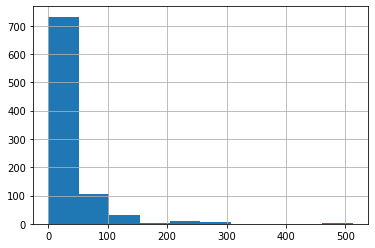

In [131]:
df.Fare.hist()

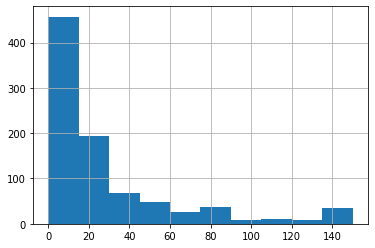

In [133]:
mean = df.Fare.mean()
std = df.Fare.std()
df.loc[df.Fare>150,'Fare'] = 150
df.Fare.hist()

In [134]:
df['Fare'] = (df.Fare - mean) / std
df.Fare

0     -0.644847
1      1.232076
2     -0.625062
3      0.699093
4     -0.621398
         ...   
886   -0.476305
887    0.021993
888   -0.169998
889    0.021993
890   -0.630191
Name: Fare, Length: 891, dtype: float64

In [140]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked,Sex_Code,Embarked_Code,Age_normalized
0,0,3,male,22.000000,-0.644847,S,0,1.0,0.271174
1,1,1,female,38.000000,1.232076,C,1,0.0,0.472229
2,1,3,female,26.000000,-0.625062,S,1,1.0,0.321438
3,1,1,female,35.000000,0.699093,S,1,1.0,0.434531
4,0,3,male,35.000000,-0.621398,S,0,1.0,0.434531
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,-0.476305,S,0,1.0,0.334004
887,1,1,female,19.000000,0.021993,S,1,1.0,0.233476
888,0,3,female,29.699118,-0.169998,S,1,1.0,0.367921
889,1,1,male,26.000000,0.021993,C,0,0.0,0.321438
